In [ ]:
# grader-required-cell

import csv
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

# sign_mnist_train.csv
!gdown https://drive.google.com/uc?id=1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
# sign_mnist_test.csv
!gdown https://drive.google.com/uc?id=1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg

In [13]:
# grader-required-cell

TRAINING_FILE = './sign_mnist_train.csv'
VALIDATION_FILE = './sign_mnist_test.csv'

# grader-required-cell

with open(TRAINING_FILE) as training_file:
  line = training_file.readline()
  print(f"Перший рядок (заголовок) виглядає так:\n{line}")
  line = training_file.readline()
  print(f"Кожен наступний рядок (точки даних) виглядає так:\n{line}")

Перший рядок (заголовок) виглядає так:
label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,p

In [14]:
# grader-required-cell

# GRADED FUNCTION: parse_data_from_input
def parse_data_from_input(filename):
  """
  Розбирає зображення та мітки з CSV-файлу
  
  Args:
    filename (string): шлях до CSV-файлу
    
  Returns:
    images, labels: кортеж з масивів numpy, що містять зображення та мітки
  """
  with open(filename) as file:
    ### START CODE HERE

    # Використовуйте csv.reader, передавши відповідний роздільник
    # Пам'ятайте, що csv.reader може бути проітерований і повертає один рядок з файлу csv на кожній ітерації
    csv_reader = csv.reader(file, delimiter=',')
    
    labels = []
    images = []

    # Пропустити перший рядок, оскільки він містить заголовки стовпців
    next(csv_reader)
    
    # Ітерування через рядки у файлі CSV
    for row in csv_reader:
        # Отримання мітки першого значення рядка
        label = row[0]
        # Отримання значень пікселів
        pixels = np.array(row[1:], dtype=np.float64)
        # Перетворення розміру пікселів у вигляді 28x28
        image = pixels.reshape((28, 28))
        # Додавання мітки та зображення до відповідних списків
        labels.append(label)
        images.append(image)
    
    # Конвертування списків в масиви numpy
    labels = np.array(labels, dtype=np.float64)
    images = np.array(images, dtype=np.float64)
    
    ### END CODE HERE

    return images, labels

# grader-required-cell

# Перевірте вашу функцію
training_images, training_labels = parse_data_from_input(TRAINING_FILE)
validation_images, validation_labels = parse_data_from_input(VALIDATION_FILE)

print(f"Форма зображень навчання: {training_images.shape} і dtype: {training_images.dtype}")
print(f"Форма міток навчання: {training_labels.shape} і dtype: {training_labels.dtype}")
print(f"Форма зображень перевірки: {validation_images.shape} і dtype: {validation_images.dtype}")
print(f"Форма міток перевірки: {validation_labels.shape} і dtype: {validation_labels.dtype}")

Форма зображень навчання: (27455, 28, 28) і dtype: float64
Форма міток навчання: (27455,) і dtype: float64
Форма зображень перевірки: (7172, 28, 28) і dtype: float64
Форма міток перевірки: (7172,) і dtype: float64


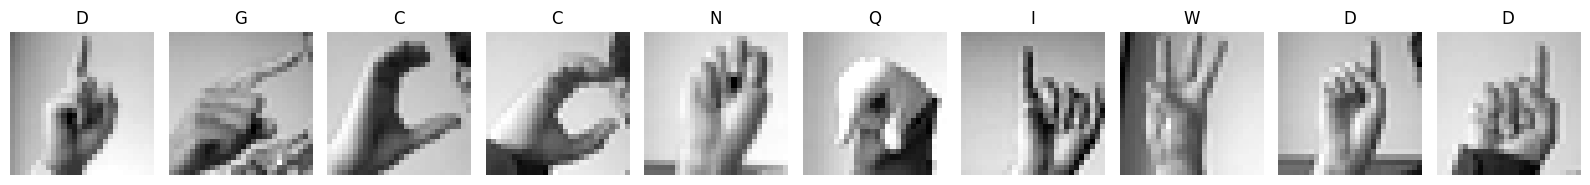

In [15]:
# Plot a sample of 10 images from the training set
def plot_categories(training_images, training_labels):
    fig, axes = plt.subplots(1, 10, figsize=(16, 15))
    axes = axes.flatten()
    letters = list(string.ascii_uppercase)  # змінено на верхній регістр для відображення міток від A до Z

    for k in range(10):
        img = training_images[k]
        img = np.expand_dims(img, axis=-1)
        img = array_to_img(img)
        ax = axes[k]
        ax.imshow(img, cmap="gray")  # змінено cmap на "gray" для кращого відображення зображень в градаціях сірого
        ax.set_title(f"{letters[int(training_labels[k])]}")
        ax.set_axis_off()

    plt.tight_layout()
    plt.show()

plot_categories(training_images, training_labels)

In [17]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(training_images, training_labels, validation_images, validation_labels):
  """
  Creates the training and validation data generators
  
  Args:
    training_images (array): parsed images from the train CSV file
    training_labels (array): parsed labels from the train CSV file
    validation_images (array): parsed images from the test CSV file
    validation_labels (array): parsed labels from the test CSV file
    
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # Add another dimension to the data
  training_images = np.expand_dims(training_images, axis=-1)
  validation_images = np.expand_dims(validation_images, axis=-1)

  # Instantiate the ImageDataGenerator class 
  # Normalize pixel values and set arguments to augment the images (if desired)
  train_datagen = ImageDataGenerator(rescale=1.0/255.0, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2)

  # Pass in the appropriate arguments to the flow method
  train_generator = train_datagen.flow(x=training_images,
                                       y=training_labels,
                                       batch_size=32) 

  
  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  # Remember that validation data should not be augmented
  validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

  # Pass in the appropriate arguments to the flow method
  validation_generator = validation_datagen.flow(x=validation_images,
                                                 y=validation_labels,
                                                 batch_size=32) 


  return train_generator, validation_generator

# Test your generators
train_generator, validation_generator = train_val_generators(training_images, training_labels, validation_images, validation_labels)

print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")

Images of training generator have shape: (27455, 28, 28, 1)
Labels of training generator have shape: (27455,)
Images of validation generator have shape: (7172, 28, 28, 1)
Labels of validation generator have shape: (7172,)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def create_model():
    # Define the model
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(26, activation='softmax')  # 26 units for the English alphabet
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # Suitable for multi-class classification
                  metrics=['accuracy'])

    return model

# Save your model
model = create_model()

# Display the model architecture
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,098 (887.10 KB)

 Trainable params: 227,098 (887.10 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Train your model
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator)

Epoch 1/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.1506 - loss: 2.8558 - val_accuracy: 0.6060 - val_loss: 1.1969
Epoch 2/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.5093 - loss: 1.5383 - val_accuracy: 0.6849 - val_loss: 0.8654
Epoch 3/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.6467 - loss: 1.0881 - val_accuracy: 0.7883 - val_loss: 0.5535
Epoch 4/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.7183 - loss: 0.8664 - val_accuracy: 0.8390 - val_loss: 0.4225
Epoch 5/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.7622 - loss: 0.7250 - val_accuracy: 0.8841 - val_loss: 0.3051
Epoch 6/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.7953 - loss: 0.6238 - val_accuracy: 0.9293 - val_loss: 0.2202
Epoch 7/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.8195 - loss: 0.5465 - val_accuracy: 0.9342 - val_loss: 0.1947
Epoch 8/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.8404 - loss: 0.4925 - 

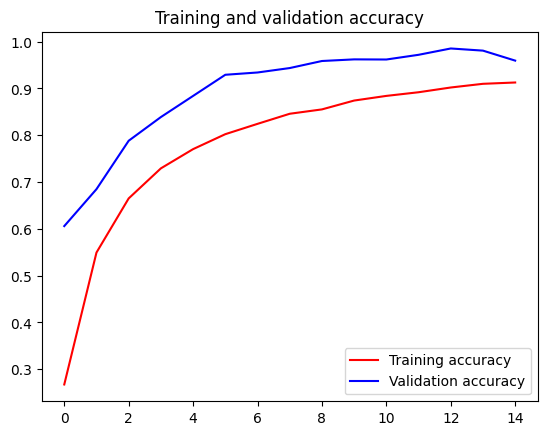

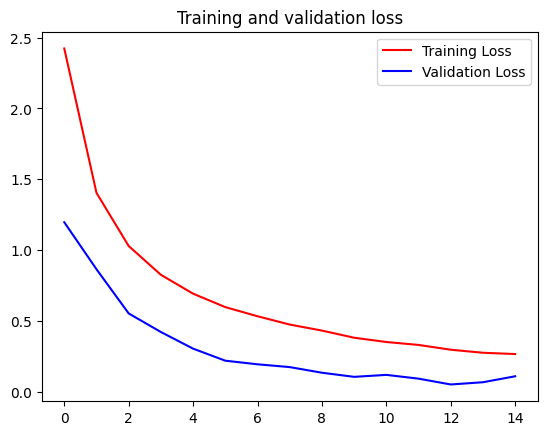

In [23]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()